In [ ]:
"""
link do dataset:
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data
"""

In [1]:
# imports
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [7]:
# salvar o dataset
df = pd.read_csv("heart.csv")

# separando entre labels e target
data_values = df.iloc[:, :-1].values
data_labels = df.iloc[:, -1:].values


# normalizando os valores
data = (data_values - np.mean(data_values, axis=0)) / np.std(data_values, axis=0)

# Separando as instâncias em um conjunto de treinamento e um de teste
train_data, test_data, train_labels, test_labels = train_test_split(data, data_labels, test_size=0.25, random_state=42)

In [8]:
# utilizando GridSearch para testar vários possíveis parâmetros para o algoritmo e escolher os melhores, que levem a um maior score na cross-validation
param_grid = {
    'criterion': ["gini", "entropy", "log_loss"],
    'splitter': ["best", "random"],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14, 16],
    'max_features': ["sqrt", "log2", None]
}

# Criando e treinando o modelo de árvore de decisão
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=10)
grid_search.fit(train_data, train_labels)

print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")
print(f"Validação cruzada (cross-validation) do conjunto de dados de treinamento: {grid_search.best_score_}")

Melhores parâmetros encontrados: {'criterion': 'entropy', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 14, 'min_samples_split': 20, 'splitter': 'random'}
Validação cruzada (cross-validation) do conjunto de dados de treinamento: 0.8411067193675889


Dessa forma, temos como melhores parâmetros
- creterion: entropy
- max_depth: 12
- max_features: None
- min_samples_leaf: 14
- min_samples_split: 20
- splitter: random

Cross-validation: 84.11%

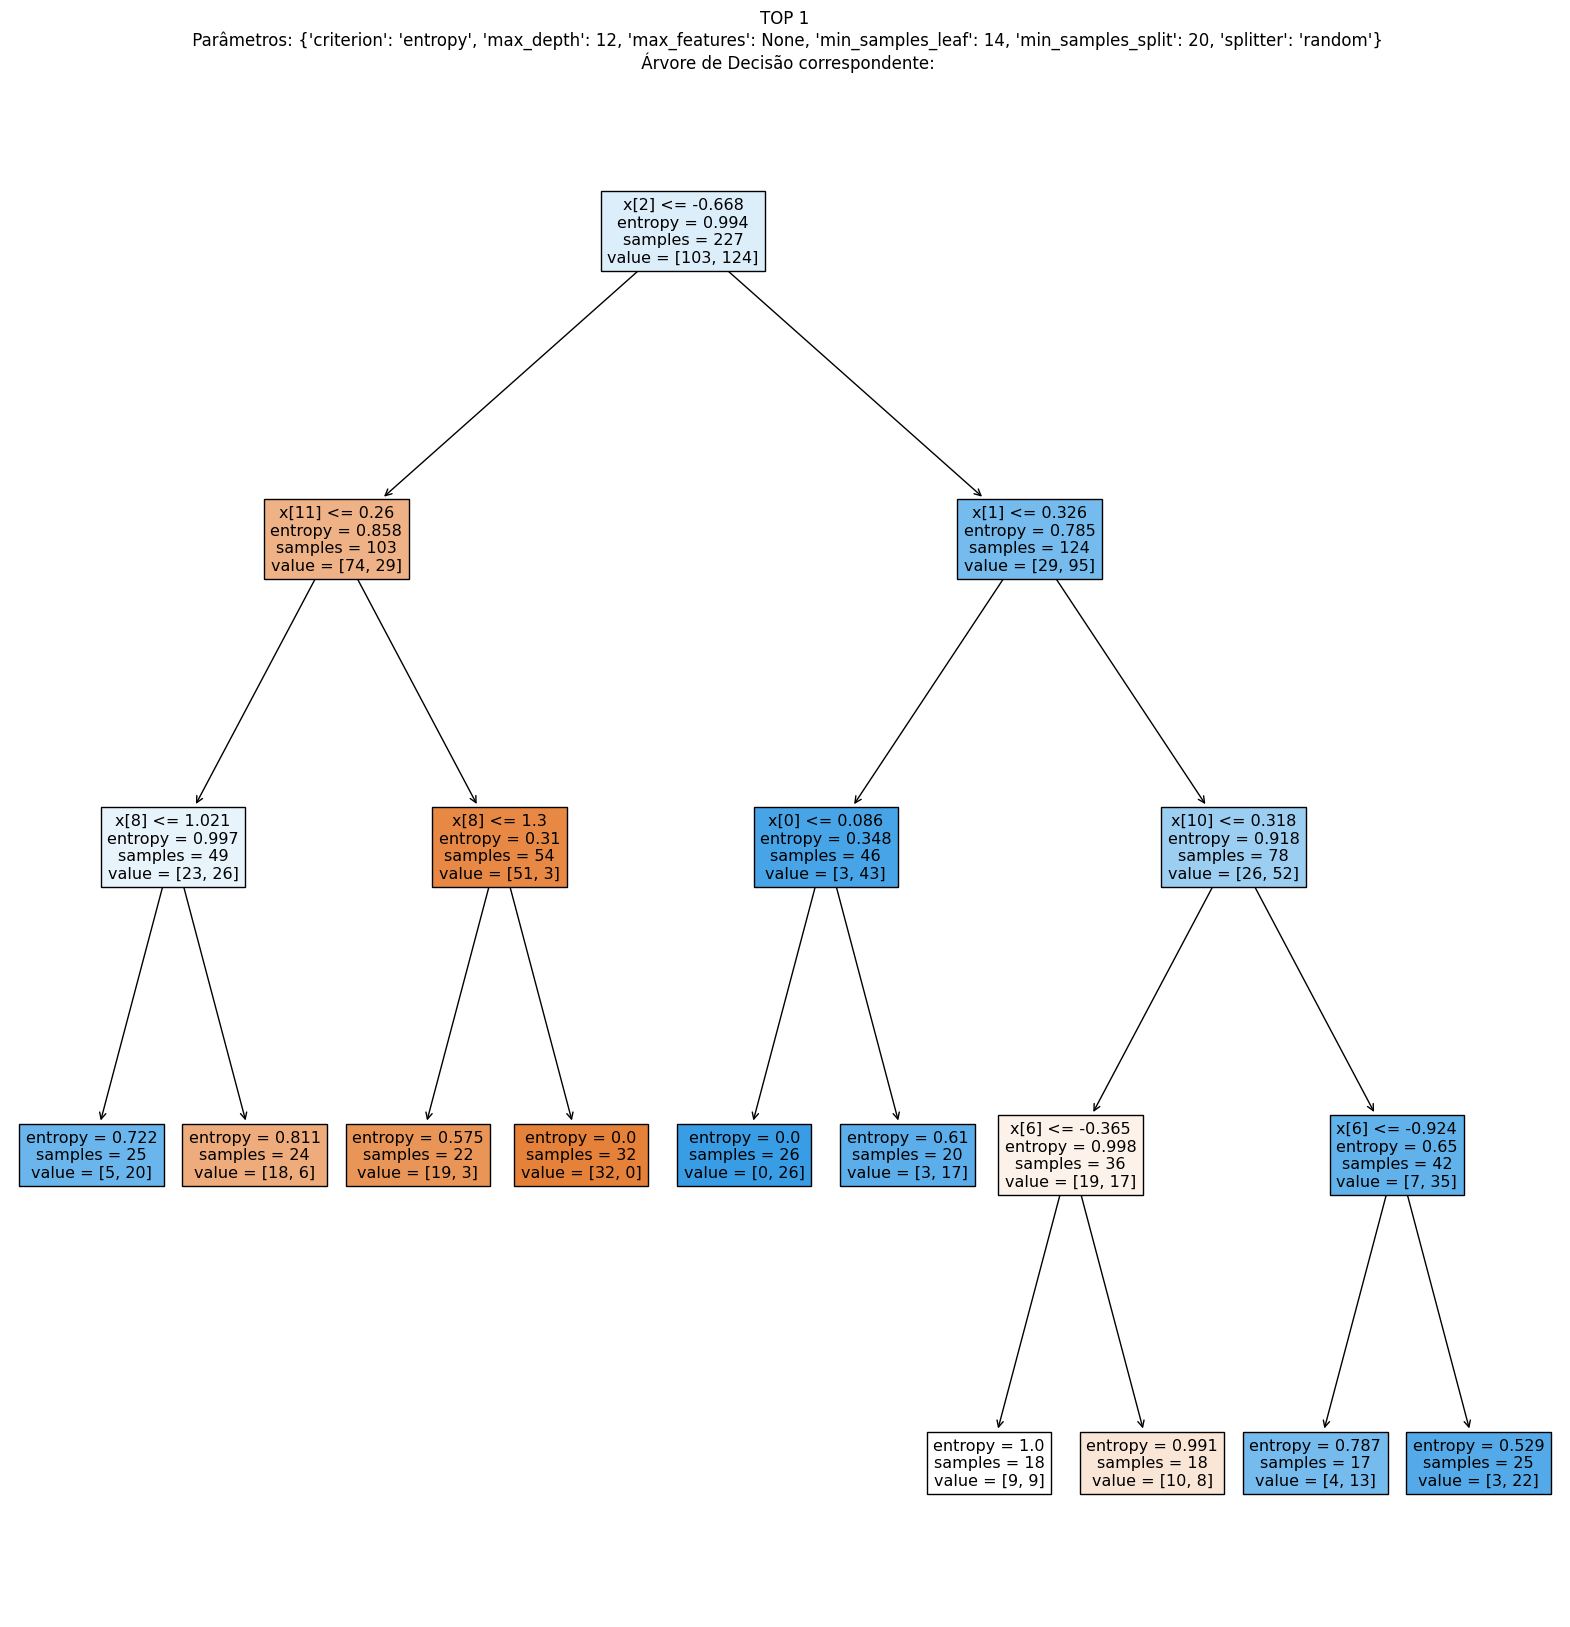

Média do cross-validation do teste: 0.7233333333333334
Acurâcia do teste: 0.7894736842105263
Precisão do teste: 0.8571428571428571
Sensibilidade (recall) do teste: 0.7317073170731707
F1-Score do teste: 0.7894736842105263



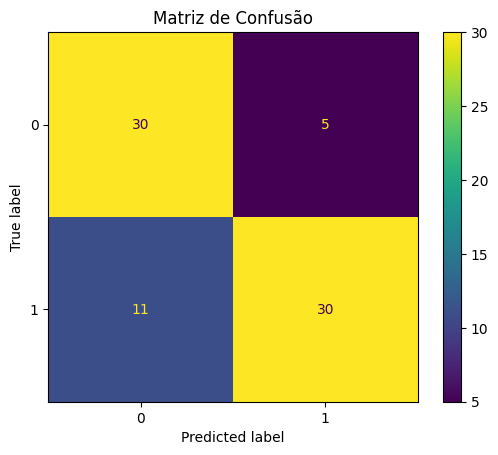

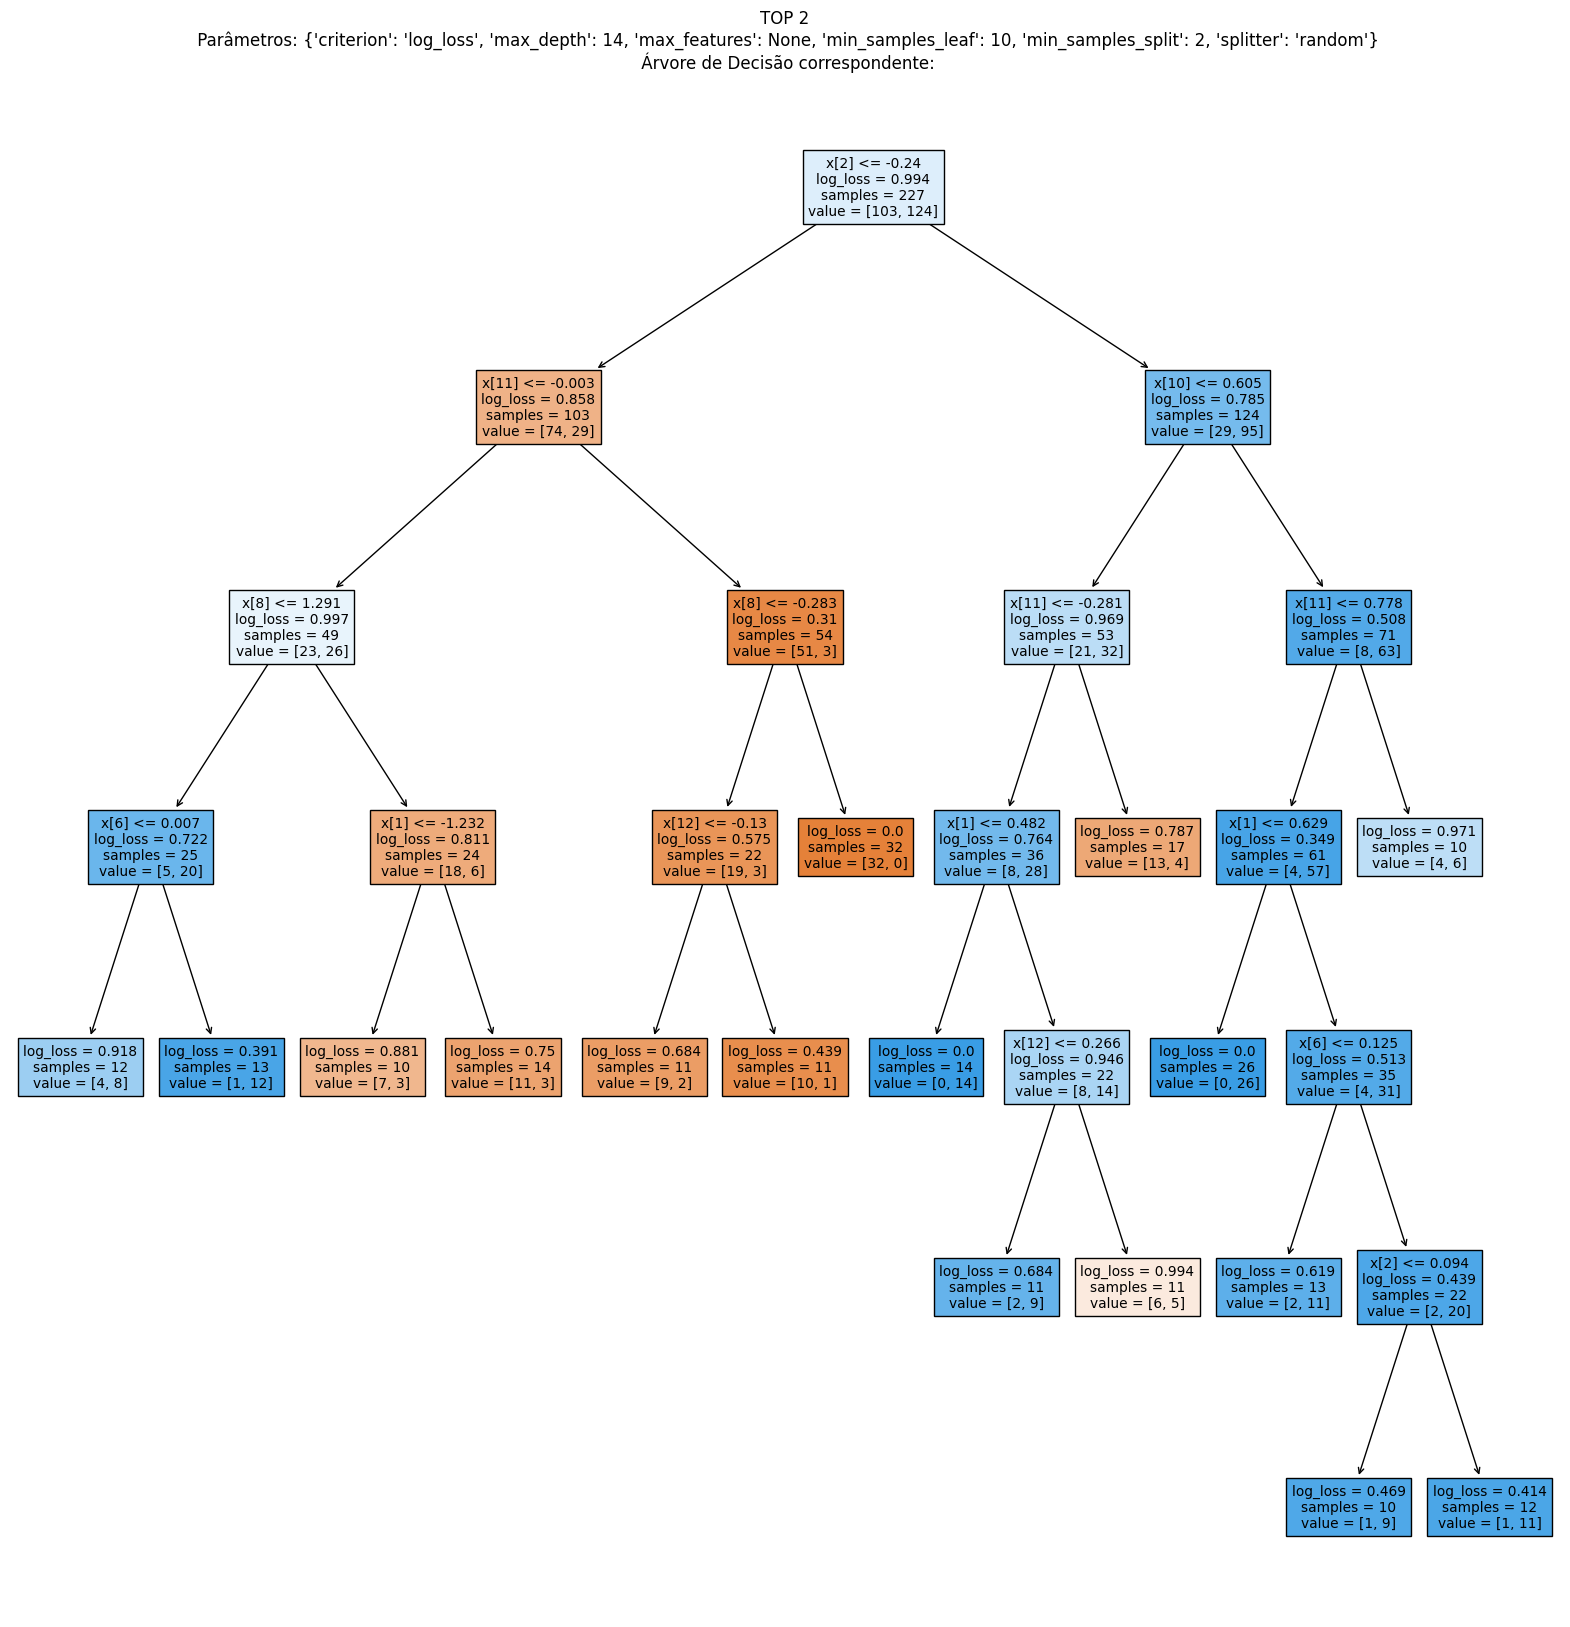

Média do cross-validation do teste: 0.7091666666666667
Acurâcia do teste: 0.8026315789473685
Precisão do teste: 0.8421052631578947
Sensibilidade (recall) do teste: 0.7804878048780488
F1-Score do teste: 0.810126582278481



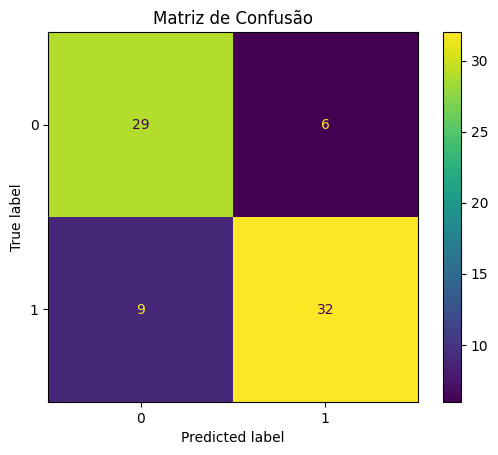

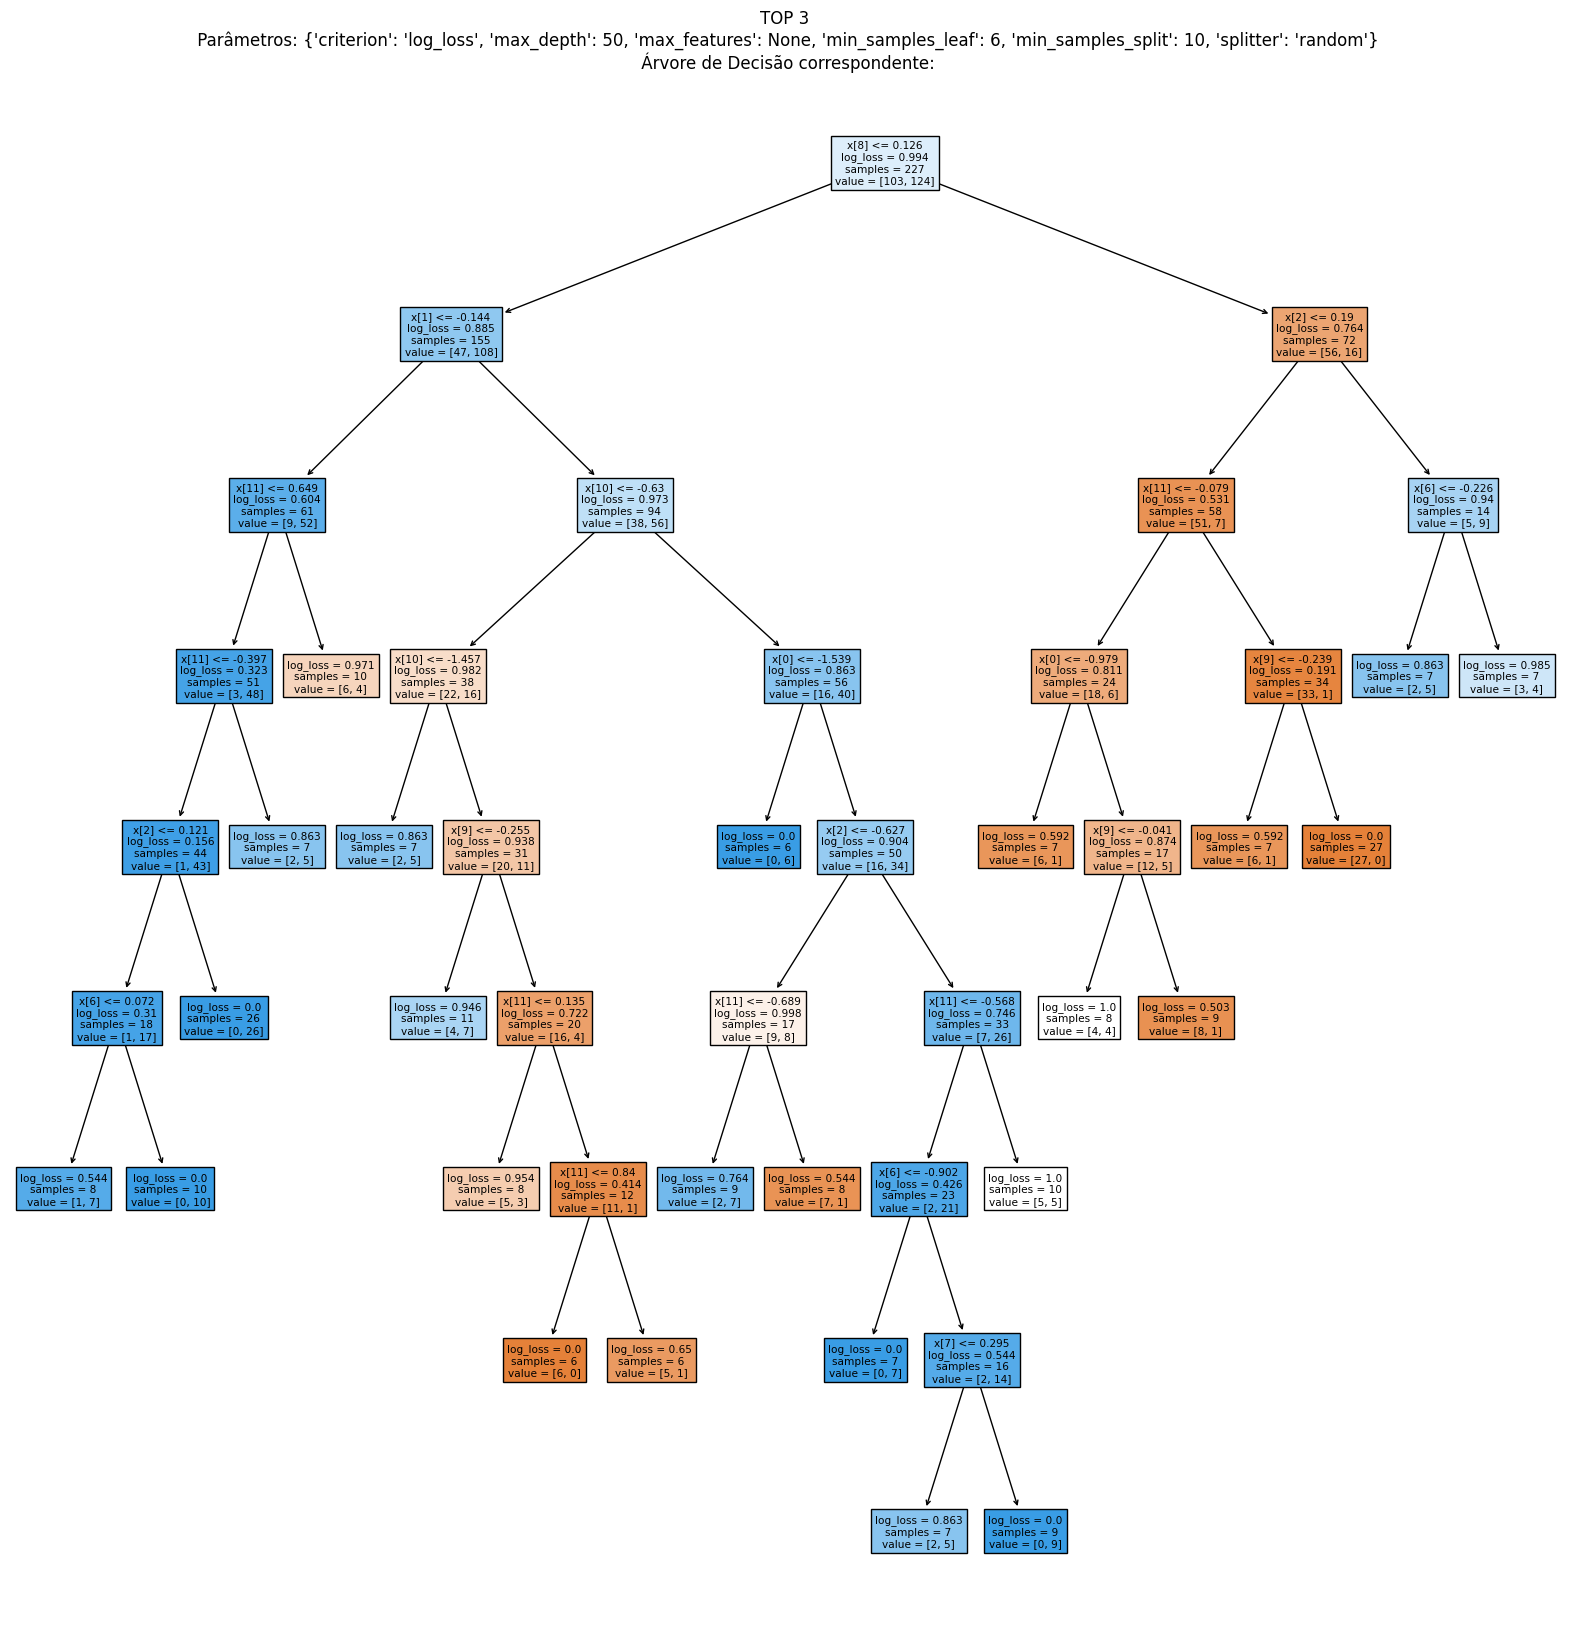

Média do cross-validation do teste: 0.7358333333333333
Acurâcia do teste: 0.7894736842105263
Precisão do teste: 0.8787878787878788
Sensibilidade (recall) do teste: 0.7073170731707317
F1-Score do teste: 0.7837837837837839



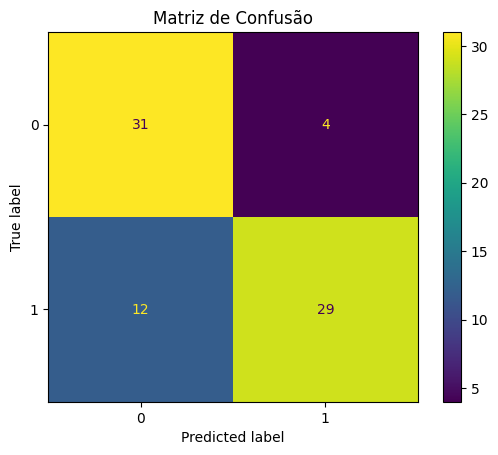

In [14]:
# Retornando o top 3 dos resultados com maior cross-validation
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
top_results = results.head()

for i, params in enumerate(top_results['params']):
    if i == 3:
      break;

    # Criando e treinando o modelo
    dt = DecisionTreeClassifier(**params)
    dt.fit(train_data, train_labels)

    # Plotando a Árvore de Decisão
    plt.figure(figsize=(20,20))
    plot_tree(dt, filled=True)
    plt.title(f"TOP {i+1}\n Parâmetros: {params}\n Árvore de Decisão correspondente:")
    plt.show()

    # Criando o modelo de matrix de confusão
    labels_pred = dt.predict(test_data)
    cm = confusion_matrix(test_labels, labels_pred)

    # Informações sobre a eficiência do modelo
    print(f"Média do cross-validation do teste: {np.mean(cross_val_score(dt, test_data, test_labels, cv=5))}")
    print(f"Acurâcia do teste: {accuracy_score(test_labels, labels_pred)}")
    print(f"Precisão do teste: {precision_score(test_labels, labels_pred, pos_label=1)}")
    print(f"Sensibilidade (recall) do teste: {recall_score(test_labels, labels_pred, pos_label=1)}")
    print(f"F1-Score do teste: {f1_score(test_labels, labels_pred, pos_label=1)}\n")

    # Plotado a Matriz de Confusão
    display = ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title("Matriz de Confusão")
    plt.show()